In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.regression import *

In [2]:
%cd ..
%cd data\processed
df = pd.read_csv('2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\data\processed


In [3]:
df.columns

Index(['owner_no', 'order_dt', 'tot_ticket_paid_amt',
       'tot_contribution_paid_amt', 'first_order_dt', 'first_cont_dt',
       'geo_area_desc', 'Prelim Capacity', 'ltv_tkt_value', 'Lifetime Giving',
       'prospect_board', 'days_to_donation', 'first_cont_order',
       'first_cont_after', 'rolling_tkt_sum', 'channel_desc_3rd Party',
       'channel_desc_At the Performance', 'channel_desc_Chat',
       'channel_desc_Default Channel', 'channel_desc_Email',
       'channel_desc_Fax', 'channel_desc_Internal Request',
       'channel_desc_Mail', 'channel_desc_Mobile', 'channel_desc_Online',
       'channel_desc_Phone', 'channel_desc_Telefunding',
       'channel_desc_Walk Up', 'MOS_desc_External', 'MOS_desc_Internal',
       'MOS_desc_Ticketing', 'delivery_desc_Digital',
       'delivery_desc_Do Not Print Tickets', 'delivery_desc_Mail',
       'delivery_desc_Will Call', 'facility_desc_Academy of Music',
       'facility_desc_Fundraiser', 'facility_desc_Independence Mall',
       'faci

In [4]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after', 'first_cont_dt','first_order_dt','first_cont_order', 'days_to_donation','tot_contribution_paid_amt'], axis=1)
df.shape

(70372, 35)

In [5]:
df = df[df['Lifetime Giving'] < df['Lifetime Giving'].quantile(.95)]
df.shape

(66851, 35)

In [6]:
setup(
    df, 
    target = 'Lifetime Giving',
    train_size = 0.8,
    verbose = True,
    numeric_features = [
        'geo_area_desc',
        'Prelim Capacity'
    ]
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3763
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(66851, 35)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  tot_ticket_paid_amt  geo_area_desc  Prelim Capacity  \
 0          111.0             0.262550            1.0              5.0   
 1          111.0             0.280947            1.0              5.0   
 2          111.0             0.170287            1.0              5.0   
 3          258.0             0.290096            5.0              6.0   
 4          262.0             0.110229            2.0              4.0   
 ...          ...                  ...            ...              ...   
 70367  2419011.0            -0.720197            2.0              5.0   
 70368  2419126.0            -0.720197            1.0              0.0   
 70369  2419248.0             0.420163            2.0              4.0   
 70370  2419278.0             0.405498            1.0              3.0   
 70371  2419301.0             0.243553            1.0              0.0   
 
        ltv_tkt_value  rolling_tkt_sum  prospect_board_0  prospect_board_1  \
 0           0.104660         0.

In [7]:
model = compare_models(exclude = ['ransac'], verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,0.7455,2.1019,1.4496,0.5434,0.5268,0.4700,36.0852
1,K Neighbors Regressor,0.5968,2.3027,1.5169,0.4998,0.5275,0.3559,2.9225
2,Extreme Gradient Boosting,0.8118,2.3562,1.5346,0.4882,0.5386,0.5409,7.7882
3,CatBoost Regressor,0.8864,2.6597,1.6306,0.4225,0.5675,0.5871,15.0598
4,Light Gradient Boosting Machine,0.9461,2.9339,1.7126,0.3629,0.5879,0.6273,0.5971
5,Extra Trees Regressor,0.9208,3.0184,1.7372,0.3443,0.6155,0.5754,55.2372
6,Gradient Boosting Regressor,1.0307,3.3271,1.8238,0.2775,0.6193,0.6778,16.2208
7,Decision Tree,0.6219,3.9055,1.9759,0.1508,0.6128,0.4245,1.6081
8,Bayesian Ridge,1.2293,3.9648,1.9910,0.1390,0.6912,0.7597,0.3430
9,Linear Regression,1.2289,3.9652,1.9911,0.1389,0.6913,0.7591,0.2117


In [8]:
%cd ..\..
%cd reports/figures

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\reports\figures


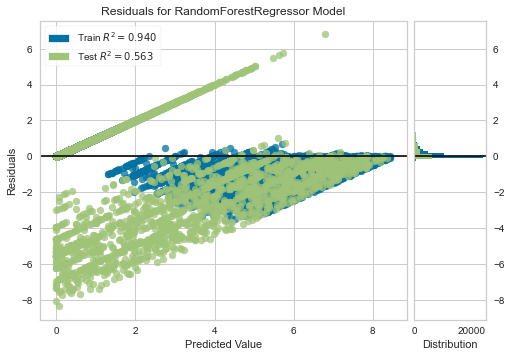

In [9]:
plot_model(model, plot='residuals', save=True, verbose=True)

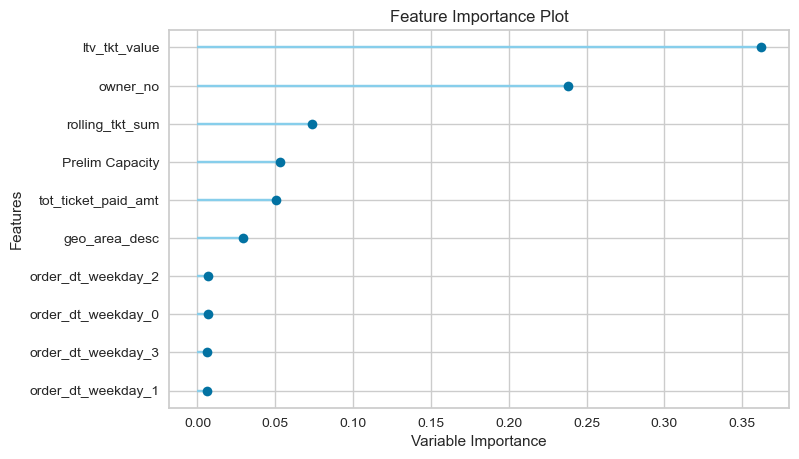

In [10]:
plot_model(model, plot='feature', save=True, verbose=True)

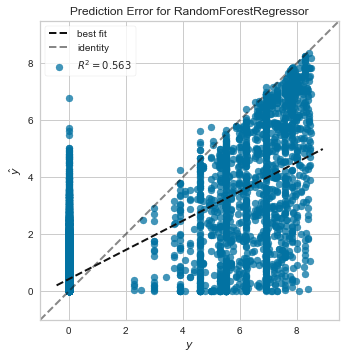

In [11]:
plot_model(model, plot='error', save=True, verbose=True)

In [12]:
predict_model(model, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.7316,2.0351,1.4266,0.5631,0.5241,0.4545


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,...,order_dt_weekday_3,order_dt_weekday_4,order_dt_weekday_5,order_dt_weekday_6,order_dt_is_month_end_0,order_dt_is_month_end_1,order_dt_is_month_start_0,order_dt_is_month_start_1,Lifetime Giving,Label
0,2193890.0,0.313667,1.0,0.0,0.308950,0.279877,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.69120,6.8578
1,2208637.0,0.312308,5.0,4.0,0.033698,0.113355,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00000,0.3016
2,2291729.0,-0.720197,7.0,3.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00000,0.0000
3,2372987.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00000,0.0000
4,2381894.0,0.168331,1.0,2.0,-0.089655,-0.018400,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00000,0.0943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,2409864.0,0.094219,1.0,4.0,-0.105931,-0.086221,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00000,0.1612
13367,2373415.0,0.392886,1.0,3.0,0.143754,0.230907,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00000,0.0731
13368,1682367.0,0.236580,2.0,2.0,-0.031182,0.044056,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00000,0.0599
13369,2386419.0,-0.720197,1.0,3.0,0.404030,0.479584,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.68708,7.2350


In [13]:
%cd ..\..
%cd models

C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions
C:\Users\SiddharthaMisra\Documents\Springboard\ML_Contributions\models


In [14]:
save_model(model, 'PyCaret on Target 4 - outliers removed', verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [ ]:
interpret_model(model)